### 1- Principais Conceitos

![](../photos/6.1.1.png)

### 2- Cálculo dos Coeficientes

![](../photos/6.2.1.png)

![](../photos/6.2.2.png)

Coeficiente: 0.6
Intercepto: 2.2


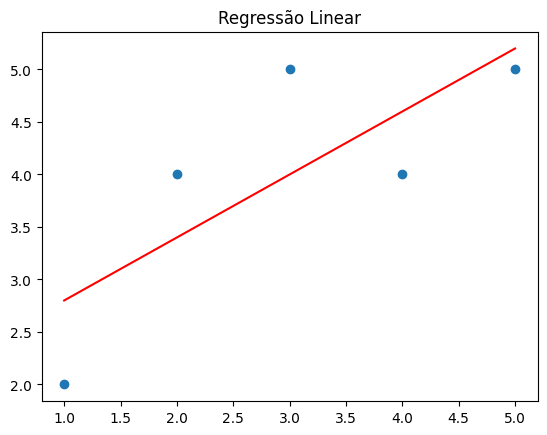

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Exemplo de regressão linear
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()
model.fit(X, y)

print(f"Coeficiente: {model.coef_[0]}")
print(f"Intercepto: {model.intercept_}")

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regressão Linear')
plt.show()

### 3 - Exemplo de Projeto de Regressão Linear

In [1]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [8]:
import pandas as pd

print(california['DESCR'])
X = california['data']
y = california['target']

df = pd.DataFrame(X, columns=california['feature_names'])


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [9]:
df[df['AveOccup'] > 500] #ocupações com mais de 500 pessoas > parecem ser prisões (outliers)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98


In [10]:
df[df['AveRooms'] > 100] #muitos quartos > parece ser hoteis (outliers)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08


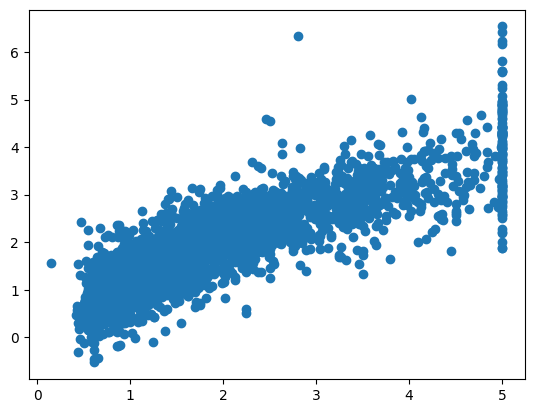

In [14]:
from sklearn.model_selection import train_test_split

#separaçao dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

df_train = pd.DataFrame(X_train, columns=california['feature_names'])

# Filtrar os dados (remover outliers)
def filtra_dados(X, y, columns):
    df = pd.DataFrame(X, columns=columns)
    df['target'] = y
    df = df[
        (df['AveOccup'] < 6) &
        (df['AveRooms'] < 12) &
        (df['AveBedrms'] < 2) &
        (df['MedInc'] < 15) &
        (df['HouseAge'] < 52)   
    ]
    X_filt = df[columns].values
    y_filt = df['target'].values
    return X_filt, y_filt

X_train_filt, y_train_filt = filtra_dados(X_train, y_train, california['feature_names'])
X_test_filt, y_test_filt = filtra_dados(X_test, y_test, california['feature_names'])


# Treinar o modelo
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_filt, y_train_filt)

#split dos dados de treino em treino e validação para avaliar os hiperparametros
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(
    X_train_filt,
    y_train_filt,
    test_size=0.2,
    random_state=42,
)

# Treinar o modelo

model.fit(X_train_, y_train_)
y_pred = model.predict(X_valid_) 

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_valid_, y_pred) #calculad o erro médio quadrático

std = y_valid_.std()

import matplotlib.pyplot as plt
plt.plot(y_valid_, y_pred, 'o') #plota o gráfico

### 4- Feature engineering

Feature engineering é o processo de usar conhecimento do domínio para selecionar, modificar ou criar variáveis (features) que possam melhorar o desempenho de um modelo preditivo. É uma etapa crucial no desenvolvimento de modelos de aprendizado de máquina, pois a qualidade e relevância das features podem ter um impacto significativo na eficácia do modelo. Alguns exemplos de Feature engineering são:

![](../photos/6.4.1.png)

![](../photos/6.4.2.png)

A classe PolynomialFeatures transforma seus dados de entrada adicionando novas colunas que são combinações polinomiais dos valores originais.

Quando usamos uma regressão linear simples, o modelo só tenta ajustar uma linha reta aos dados, ou seja, ele assume que a relação entre as variáveis de entrada e saída é linear.

Porém, quando a relação entre as variáveis de entrada e saída não é linear (como no seu caso, onde $y=X^2$), uma linha reta não será suficiente. Para isso, usamos a regressão polinomial, que permite ajustar uma curva (em vez de uma linha reta) aos dados.

O PolynomialFeatures(degree=2) pega as entradas originais e as eleva ao quadrado, permitindo que o modelo se ajuste a uma relação quadrática.

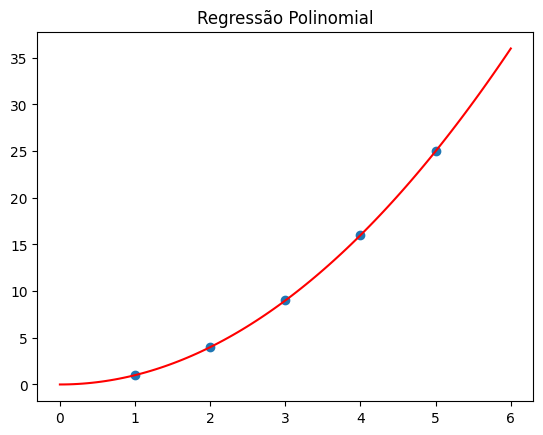

In [2]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_test = np.linspace(0, 6, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)

plt.scatter(X, y)
plt.plot(X_test, model.predict(X_test_poly), color='red')
plt.title('Regressão Polinomial')
plt.show()